# Basic network import and representation

Here, we play a bit with some network datasets using the standard Python library.

We analyze the dataset 'cit-HepTh' available from the SNAP repository: http://snap.stanford.edu/data/index.html

There are several other repositories of network datasets, for instance:
- http://konect.cc/networks/
- https://networks.skewed.de/
- http://networkrepository.com/
- http://cnets.indiana.edu/resources/data-repository/
- http://www.sociopatterns.org/datasets/

In [1]:
import sys, math

In [4]:
%matplotlib inline

In [3]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [5]:
links_out=col.defaultdict(list)
print(links_out)

defaultdict(<class 'list'>, {})


### Citation network
We analyze the HepTh citation network from the SNAP repository.
We open the file containing the network and read each line.

In [6]:
filepath='./network_data/cit-HepTh.txt'

In [7]:
fh=open(filepath,'r')

In [8]:
fh

<_io.TextIOWrapper name='./network_data/cit-HepTh.txt' mode='r' encoding='UTF-8'>

In [9]:
s=fh.readlines()

In [10]:
s[:4]

['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt\n',
 '# Paper citation network of Arxiv High Energy Physics Theory category\n',
 '# Nodes: 27770 Edges: 352807\n',
 '# FromNodeId\tToNodeId\n']

In [11]:
s[10].strip().split()

['1001', '9407087']

In [12]:
for line in s:
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t=line.strip().split()
    if t[0]!='#':
        #the first lines are comments
        origin=int(t[0])
        dest=int(t[1])
        links_out[origin].append(dest)
    
#close the file
fh.close()

In [13]:
len(links_out[1001])

83

How many nodes are in the network?

In [14]:
tot_nodes=len(links_out)
print(tot_nodes)

25059


<img src="figure/node_degree.png" width="60%">

The degree of a node is the total number of links connected to it. Let's first look at the *unidrected* graph **Node 4** has degree $k_4 = 3$. 

In the directed Graph, for **Node 4**, $k_4^{\text{in}}=1$ while $k_4^{\text{out}}=2$.

We calculate the out-degree distribution of the cit-HepTh network.

The degree distribution, as the term implies, is the **probability distribution** of all node degrees over the entire network.

In [15]:
degree_out={}

for i in links_out:

    deg_out=len(links_out[i])

    if deg_out in degree_out:
        degree_out[deg_out]+=1
    else:
        degree_out[deg_out]=1

In [16]:
print(sorted(degree_out.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 115, 120, 121, 122, 123, 124, 125, 126, 134, 135, 136, 139, 142, 143, 146, 149, 154, 156, 157, 158, 159, 160, 165, 167, 169, 170, 175, 177, 180, 181, 198, 200, 201, 207, 211, 212, 214, 216, 226, 246, 263, 274, 289, 302, 359, 562]


In [17]:
degree_out

{83: 6,
 1: 2449,
 7: 1087,
 4: 1405,
 2: 1951,
 40: 104,
 9: 847,
 27: 250,
 10: 790,
 14: 622,
 21: 398,
 25: 333,
 17: 503,
 15: 556,
 19: 429,
 16: 519,
 29: 246,
 53: 32,
 28: 244,
 22: 384,
 37: 135,
 39: 114,
 35: 162,
 20: 412,
 26: 284,
 32: 194,
 23: 339,
 6: 1172,
 11: 771,
 30: 240,
 41: 98,
 65: 17,
 24: 304,
 31: 184,
 34: 166,
 56: 31,
 18: 498,
 13: 640,
 58: 35,
 36: 149,
 8: 975,
 42: 91,
 47: 60,
 52: 39,
 38: 111,
 5: 1272,
 3: 1657,
 72: 6,
 121: 4,
 54: 34,
 75: 8,
 12: 651,
 55: 37,
 84: 4,
 59: 23,
 33: 160,
 51: 45,
 46: 55,
 63: 23,
 44: 77,
 50: 45,
 73: 11,
 71: 13,
 74: 7,
 45: 61,
 165: 1,
 126: 2,
 214: 1,
 562: 1,
 68: 10,
 64: 17,
 48: 51,
 57: 33,
 134: 3,
 49: 48,
 216: 1,
 154: 3,
 61: 10,
 159: 1,
 85: 3,
 359: 1,
 43: 81,
 78: 7,
 60: 14,
 62: 16,
 66: 15,
 157: 1,
 67: 14,
 98: 1,
 70: 14,
 115: 2,
 104: 4,
 86: 5,
 207: 1,
 99: 4,
 109: 2,
 81: 5,
 123: 1,
 97: 2,
 100: 1,
 167: 1,
 91: 2,
 201: 1,
 69: 13,
 125: 1,
 77: 8,
 89: 4,
 79: 6,
 87: 1

We export the degree distribution to an output file.

In [18]:
s_deg=sorted(degree_out.keys())

In [21]:
fout=open('./network_data/Cit-HepTh-degout-distri.txt','w')
for d in s_deg:
    
    deg_freq=float(degree_out[d])/tot_nodes 
    
    fout.write(str(d)+'  '+str(deg_freq)+'\n')

fout.close()

In [ ]:
for i in degree_out.items():
    print(i)

In [22]:
from operator import itemgetter

In [23]:
x=[]
y=[]

for i in sorted(degree_out.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes)

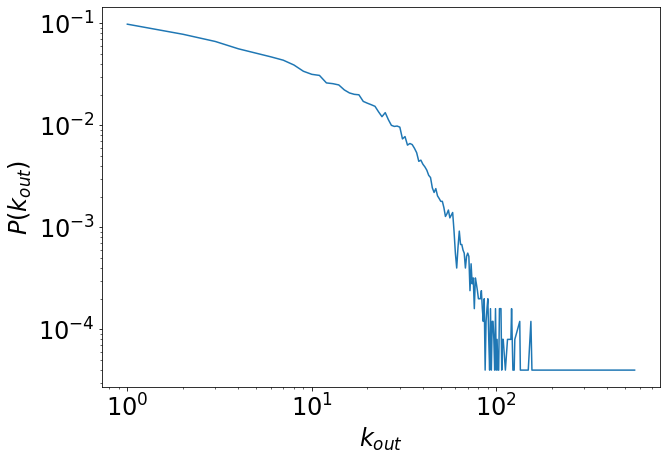

In [24]:
plt.figure(figsize=(10,7))   

plt.plot(x,y)

plt.xlabel('$k_{out}$', fontsize=24)
plt.ylabel('$P(k_{out})$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')
plt.xscale('log')

Let's have a look at the degree-in distribution.

In [25]:
links_in=col.defaultdict(list)

fh=open(filepath,'r')
#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        links_in[dest].append(origin)
    
fh.close()

In [26]:
degree_in=col.defaultdict(int)
for i in links_in.keys():
    deg=len(links_in[i])
    degree_in[deg]+=1

tot_nodes_in=len(links_in)
print(tot_nodes_in)

23180


What is the difference from an exponential distribution?

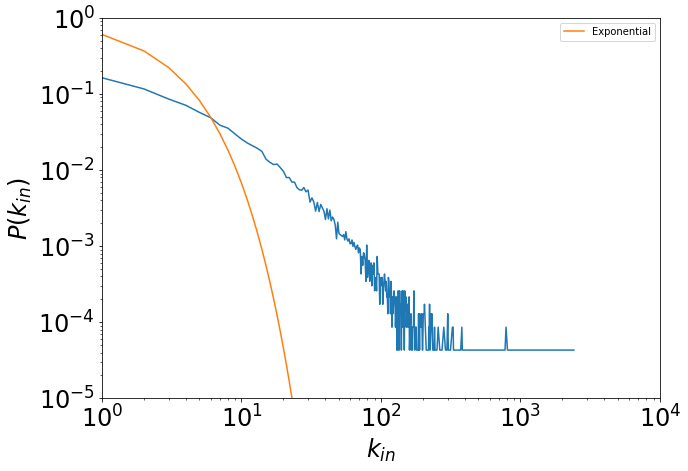

In [27]:
def f(t):
    return np.exp(-0.5*t)

x=[]
y=[]
for i in sorted(degree_in.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes_in)

plt.figure(figsize=(10,7))   
    
plt.plot(np.array(x),np.array(y))
plt.plot(np.array(x), f(np.array(x)), label='Exponential')
plt.xlabel('$k_{in}$', fontsize=24)
plt.ylabel('$P(k_{in})$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1])
plt.legend()
plt.show()